# Adjacency List and Distribution Classes

In [217]:
# Taken from https://www.programiz.com/dsa/graph-adjacency-list
# Adjascency List representation in Python

class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None
        self.color = 0
        self.isSolo = False


class AdjacencyList:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, s, d):
        # print("Adding edge", s, d)
        if(s == d): #check this shit it ran for infitity when I removed it
            print("Solo node", d)
        else:
            node = AdjNode(d)
            node.next = self.graph[s]
            self.graph[s] = node

            node = AdjNode(s)
            node.next = self.graph[d]
            self.graph[d] = node


    def has_edge(self, s, d):
        node = self.graph[s]
        while node:
            if node.vertex == d:
                return True
            node = node.next
        return False

    # Print the graph
    def print_graph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")

    def get_node_degree(self, node):
        temp = self.graph[node]
        degree = 0
        while temp:
            degree += 1
            temp = temp.next
        return degree
    
    def get_all_unused(self):
        all_nodes = []
        for i in range(self.V):
            all_nodes.append(i)
        for i in self.graph:
            temp = i
            while temp:
                if temp.color == 0:
                    all_nodes.remove(temp.vertex)
                temp = temp.next
        return all_nodes
    
    def get_degree(self, vertex):
        temp = self.graph[vertex]
        degree = 0
        while temp:
            degree += 1
            temp = temp.next
        return degree
    
    def export_AdjList(self, filename):
        with open(filename, 'w') as f:
            for i in range(self.V):
                temp = self.graph[i]
                while temp:
                    f.write(str(i) + " " + str(temp.vertex) + "\n")
                    temp = temp.next
        f.close()

    def import_AdjList(self, filename):
        with open(filename, 'r') as f:
            for line in f:
                line = line.split()
                self.add_edge(int(line[0]), int(line[1]))
        f.close()
    
    

# Graph Class

Includes functions for all of the orderings and the coloring of the graph

In [218]:
import random
import copy
import numpy as np
import gc

gc.disable() #disables garbage collection

class CreateGraph:
    def __init__(self, V = 5, E = 5, G = "COMPLETE", DIST = "UNIFORM"):
        self.AdjList = AdjacencyList(V)
        self.vertices = V
        self.edges = E
        self.graph = G
        self.distribution = DIST
        self.currentEdges = 0
        self.degrees = [0] * self.vertices
    
    def populate(self):
        if self.graph == 'COMPLETE':
            for i in range(self.vertices):
                for j in range(i+1, self.vertices):
                    self.AdjList.add_edge(i, j)
                    self.currentEdges += 1

        elif self.graph == 'CYCLE':
            for i in range(self.vertices):
                self.AdjList.add_edge(i, (i+1)%self.vertices)
                self.currentEdges += 1

        elif self.graph == 'RANDOM':
            if self.distribution == 'UNIFORM':
                while self.currentEdges < self.edges and self.currentEdges != self.vertices*(self.vertices-1)/2:
                    s = random.randint(0, self.vertices-1)
                    d = random.randint(0, self.vertices-1)
                    if self.AdjList.has_edge(s, d):
                        pass
                    elif s != d and not self.AdjList.has_edge(s, d):
                        self.AdjList.add_edge(s, d)
                        self.currentEdges += 1
                        
            elif self.distribution == 'SKEWED':
                while self.currentEdges < self.edges and self.currentEdges != (self.vertices*(self.vertices-1))/2:
                    s = min(random.randint(0, self.vertices-1), random.randint(0, self.vertices-1))
                    d = min(random.randint(0, self.vertices-1), random.randint(0, self.vertices-1))
                    if s == d or self.AdjList.has_edge(s, d):
                        pass
                    else:
                        self.AdjList.add_edge(s, d)
                        self.currentEdges += 1
            elif self.distribution == 'CUSTOM':
                while self.currentEdges < self.edges and self.currentEdges != (self.vertices*(self.vertices-1))/2:
                    s = min(random.randint(0, self.vertices-1), random.randint(0, self.vertices-1))
                    d = max(random.randint(0, self.vertices-1), random.randint(0, self.vertices-1))
                    if s == d or self.AdjList.has_edge(s, d):
                        pass
                    else:
                        self.AdjList.add_edge(s, d)
                        self.currentEdges += 1
    
    #Eric Based 
    def colorGraph(self, ordering):
        G = copy.deepcopy(self.AdjList)
        colors = [0] * self.vertices
        for i in range(len(ordering)):
            vertex = ordering[i]
            if G.graph[vertex] == None:
                continue
            else:
                temp = G.graph[vertex]
                while temp:
                    if colors[temp.vertex] == colors[vertex]:
                        colors[vertex] += 1
                        temp = G.graph[vertex]
                    else:
                        temp = temp.next
            self.AdjList.graph[vertex].color = colors[vertex]
        return colors
    
    def getDegrees(self):
        degrees = [0] * self.vertices
        for i in range(self.vertices):
            temp = self.AdjList.graph[i]
            while temp:
                degrees[i] += 1
                temp = temp.next
        self.degrees = degrees
        return degrees

    def getSmallestLastVertexOrdering(self, degrees):
        remainingDegrees = copy.deepcopy(degrees)
        ordering = []
        while len(ordering) < self.vertices:
            minDegree = self.vertices + 1
            minVertex = -1
            for i in range(self.vertices):
                if remainingDegrees[i] < minDegree and i not in ordering:
                    minDegree = remainingDegrees[i]
                    minVertex = i
            ordering.append(minVertex)
            temp = self.AdjList.graph[minVertex]
            while temp:
                remainingDegrees[temp.vertex] -= 1
                temp = temp.next
        ordering.reverse()
        return ordering
    
    def getSmallestOriginalDegreeOrdering(self, degrees):
        remainingDegrees = copy.deepcopy(degrees)
        ordering = []
        for i in range(self.vertices):
            maxDegree = -1
            maxVertex = -1
            for i in range(self.vertices):
                if remainingDegrees[i] > maxDegree:
                    maxDegree = remainingDegrees[i]
                    maxVertex = i
            remainingDegrees[maxVertex] = -1
            ordering.append(maxVertex)
        ordering.reverse()
        return ordering
    
    def getLargestOriginalDegreeOrdering(self, degrees):
        remainingDegrees = copy.deepcopy(degrees)
        ordering = []
        for i in range(self.vertices):
            maxDegree = -1
            maxVertex = -1
            for i in range(self.vertices):
                if remainingDegrees[i] > maxDegree:
                    maxDegree = remainingDegrees[i]
                    maxVertex = i
            remainingDegrees[maxVertex] = -1
            ordering.append(maxVertex)
        return ordering
    
    def getUniformRandomOrdering(self):
        ordering = []
        for i in range(self.vertices):
            ordering.append(i)
        random.shuffle(ordering)
        return ordering
    
    def getMinimumWidthOrdering(self, degrees):
        G = copy.deepcopy(self.AdjList)
        remainingDegrees = copy.deepcopy(degrees)
        widthDegrees = [0] * self.vertices
        ordering = []
        for i in range(self.vertices):
            #fills out width degrees for given state
            for j in range(self.vertices):
                temp = G.graph[j]
                neighbor_degrees = []
                # print(temp)
                while temp:
                    temp = temp.next
                    if temp:
                        neighbor_degrees.append(remainingDegrees[temp.vertex])
                #take the maximum value of the array neighbor_degrees and set it to max_neighbor_degree
                max_neighbor_degree = -1
                for k in range(len(neighbor_degrees)):
                    if k == 0:
                        max_neighbor_degree = neighbor_degrees[k]
                    else:
                        max_neighbor_degree = max(max_neighbor_degree, neighbor_degrees[k])
                widthDegrees[j] = max(widthDegrees[j], max_neighbor_degree)

            minDegree = self.vertices + 1
            minVertex = -1
            for i in range(self.vertices):
                if remainingDegrees[i] < minDegree and i not in ordering:
                    minDegree = remainingDegrees[i]
                    minVertex = i
            ordering.append(minVertex)
            temp = self.AdjList.graph[minVertex]
            while temp:
                remainingDegrees[temp.vertex] -= 1
                temp = temp.next
        # ordering.reverse()
        return ordering
    

    def getNumberOfColors(self, colors):
        maxColor = -1
        for i in range(self.vertices):
            maxColor = max(maxColor, colors[i])
        return maxColor + 1

    def print_AdjList(self):
        self.AdjList.print_graph()

## Visualizing Outputs

In [219]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [220]:
def visualize(graph):
    G = nx.Graph()
    colors = [0] * graph.V
    for i in range(graph.V):
        if(graph.graph[i] == None):
            continue
        else:
            colors[i] = graph.graph[i].color
    for i in range(graph.V):
        temp = graph.graph[i]
        while temp:
            G.add_edge(i, temp.vertex)
            temp = temp.next

    for i in range(graph.V):
        if graph.get_degree(i) == 0:
            G.add_node(i)
    nx.draw(G, with_labels=True, node_color=colors)
    plt.show()

def visualize_colors(org):
    G = nx.Graph()
    graph = copy.deepcopy(org)
    colors = []
    for i in range(graph.V):
        if(graph.graph[i] == None):
            colors.append(0)
        else:
            colors.append(graph.graph[i].color)
    
    for i in range(graph.V):
        temp = graph.graph[i]
        while temp:
            G.add_edge(i, temp.vertex)
            temp = temp.next
    
    #add isolated nodes
    for i in range(graph.V):
        if graph.get_degree(i) == 0:
            G.add_node(i)

    color_map = []
    for node in G:
        if(graph.graph[node] == None):
            color_map.append(0)
        else:
            color_map.append(graph.graph[node].color)
        

    nx.draw(G, node_color=color_map, with_labels=True)
    plt.show()


In [221]:
number_of_vertices = 5
number_of_edges = 6
Graph_type = 'RANDOM'
Random_Type = 'UNIFORM'
outGraph = CreateGraph(number_of_vertices, number_of_edges, Graph_type, Random_Type)
outGraph.populate()

# export the Adjlist of testGraph to a file
outGraph.AdjList.export_AdjList('testGraph.txt')

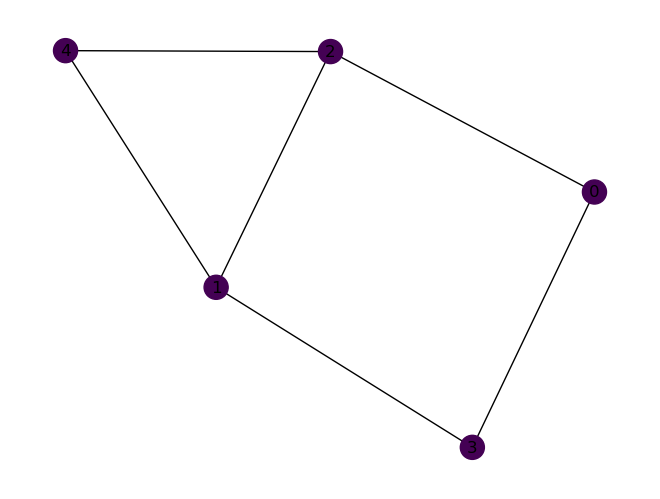

In [222]:
inGraph = CreateGraph()
#reads in from text file to populate the AdjList of the graph
inGraph.AdjList.import_AdjList('testGraph.txt')

visualize(inGraph.AdjList)

# Implimenting Graph Coloring

Shows an assortment of sample Implimentations of different graphs and different ordering algorithms applied to them

Complete Graph
Smallest Last Vertex Ordering: 
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Coloring:  [0, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Number of Colors:  10
Vertex 0  is colored  0
Vertex 1  is colored  9
Vertex 2  is colored  8
Vertex 3  is colored  7
Vertex 4  is colored  6
Vertex 5  is colored  5
Vertex 6  is colored  4
Vertex 7  is colored  3
Vertex 8  is colored  2
Vertex 9  is colored  1


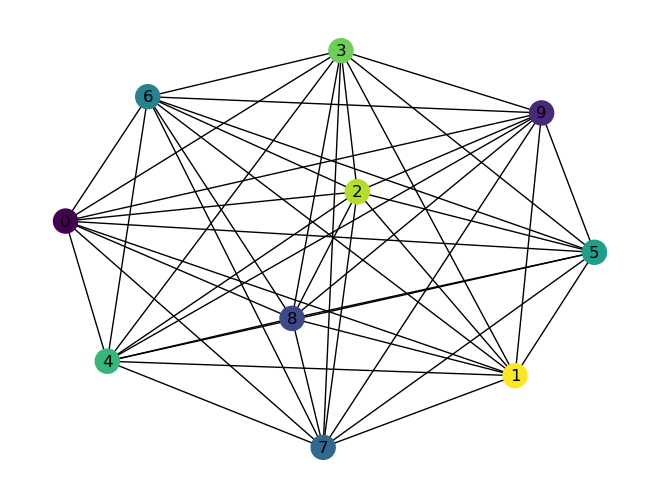

In [223]:
# Create graph and edges
print("Complete Graph")
graphComplete = CreateGraph(10, 10, 'COMPLETE', 'UNIFORM')
graphComplete.populate()
degrees = []
degrees = graphComplete.getDegrees()
ordering = graphComplete.getSmallestLastVertexOrdering(degrees)
print("Smallest Last Vertex Ordering: ")
print(ordering)
coloring = graphComplete.colorGraph(ordering)
print("Coloring: ", coloring)
print("Number of Colors: ", graphComplete.getNumberOfColors(coloring))
for i in range(coloring.__len__()):
    print("Vertex", i, " is colored ", coloring[i])
visualize_colors(graphComplete.AdjList)

Cycle Graph 

Smallest Last Vertex Ordering: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Colors: [0, 1, 2, 1, 2, 1, 2, 1, 2, 1]
Number of Colors:  3
Vertex 0  is colored  0
Vertex 1  is colored  1
Vertex 2  is colored  2
Vertex 3  is colored  1
Vertex 4  is colored  2
Vertex 5  is colored  1
Vertex 6  is colored  2
Vertex 7  is colored  1
Vertex 8  is colored  2
Vertex 9  is colored  1


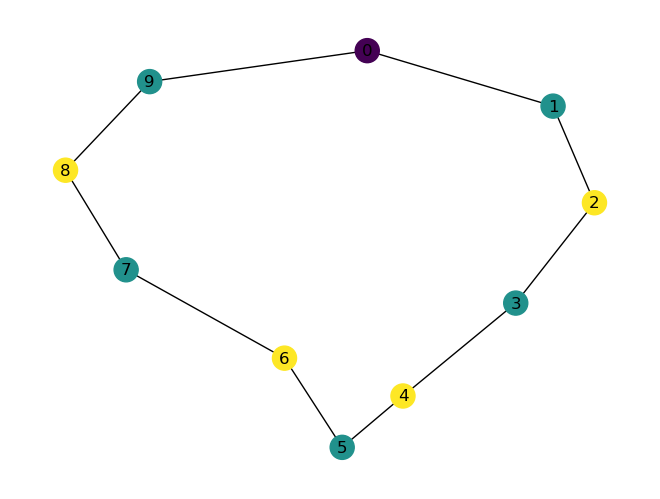

In [224]:
print("Cycle Graph", '\n')
graphCycle = CreateGraph(10, 3, 'CYCLE', 'UNIFORM')
graphCycle.populate()
degrees = []
degrees = graphCycle.getDegrees()
ordering = graphCycle.getSmallestLastVertexOrdering(degrees)
print("Smallest Last Vertex Ordering:", ordering)
coloring = graphCycle.colorGraph(ordering)
print("Colors:", coloring)
print("Number of Colors: ", graphCycle.getNumberOfColors(coloring))
for i in range(coloring.__len__()):
    print("Vertex", i, " is colored ", coloring[i])
visualize_colors(graphCycle.AdjList)

Random Uniform Graph 

Degrees: [1, 3, 4, 1, 2, 3]
Smallest Last Vertex Ordering:  [5, 4, 2, 1, 3, 0]
Smallest Last Vertex Coloring [0, 2, 3, 0, 2, 1]
Number of Colors:  4


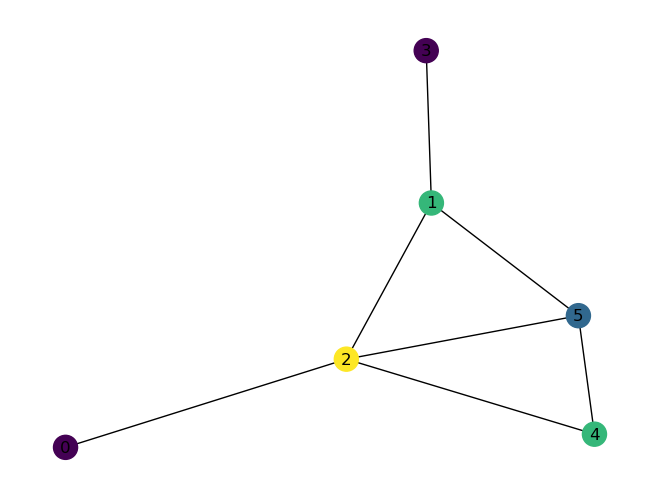

Degrees: [1, 3, 4, 1, 2, 3]
Smallest Original Degree Ordering:  [3, 0, 4, 5, 1, 2]
Smallest Original Degree Coloring [1, 3, 0, 1, 1, 2]
Number of Colors:  4


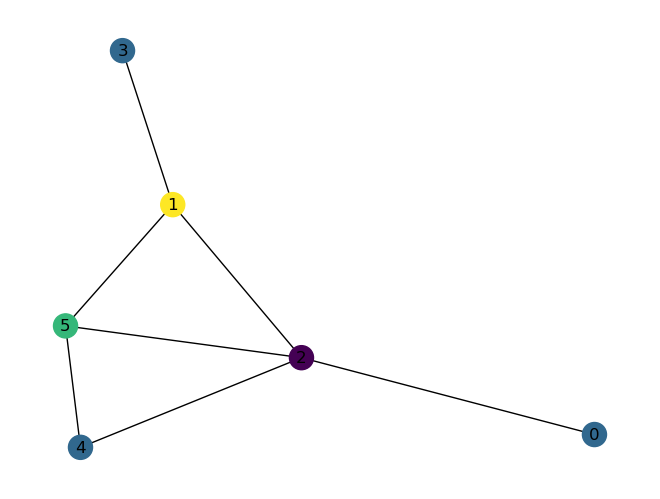

Degrees: [1, 3, 4, 1, 2, 3]
Largest Original Degree Ordering:  [2, 1, 5, 4, 0, 3]
Largest Original Degree Coloring [0, 2, 1, 0, 0, 3]
Number of Colors:  4


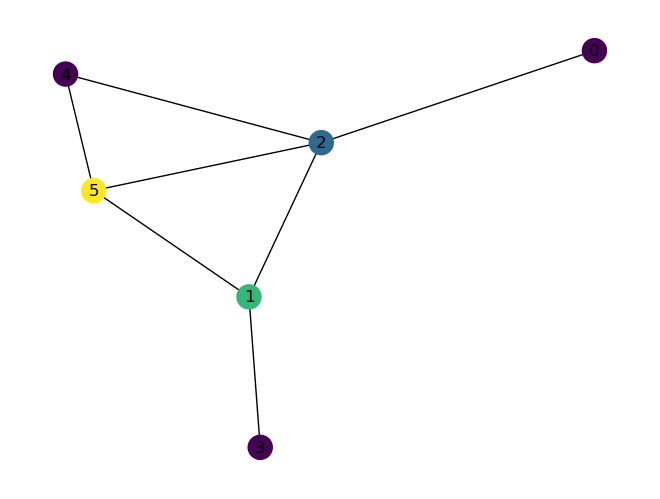

Uniform Random Ordering:  [3, 0, 1, 5, 2, 4]
Uniform Random Coloring [1, 2, 3, 1, 0, 1]
Number of Colors:  4


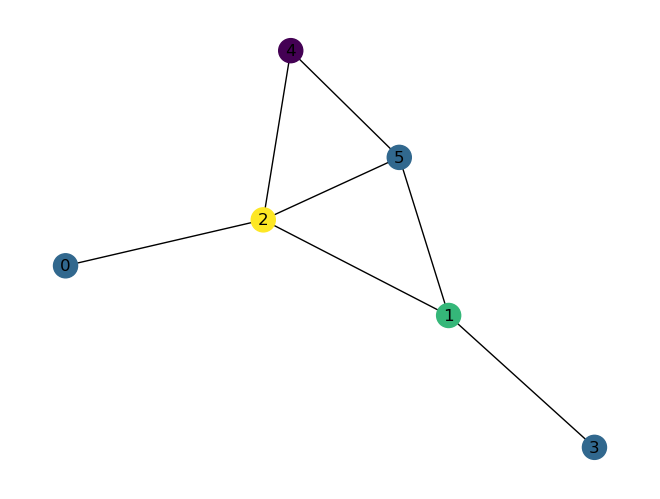

Minimum Width ordering:  [0, 3, 1, 2, 4, 5]
Minimum Width coloring [1, 2, 3, 1, 1, 0]
Number of Colors:  4


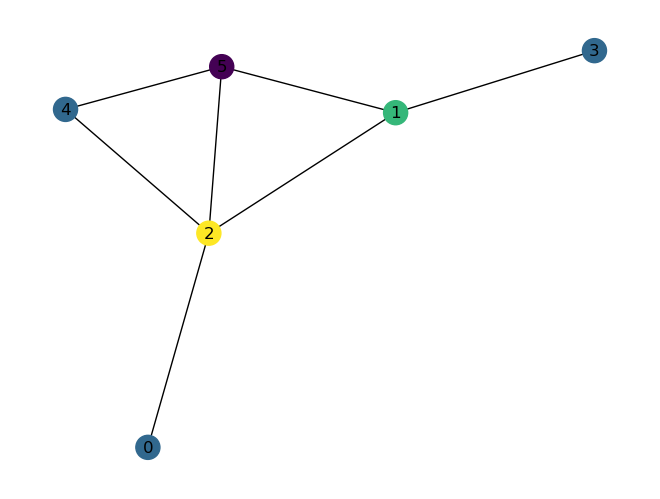

In [261]:
print("Random Uniform Graph", '\n')
graphRandUni = CreateGraph(6, 7, 'RANDOM', 'UNIFORM')
graphRandUni.populate()
degrees = []
degrees = graphRandUni.getDegrees()
ordering = graphRandUni.getSmallestLastVertexOrdering(degrees)
print("Degrees:", degrees)
print("Smallest Last Vertex Ordering: ", ordering)
coloring = graphRandUni.colorGraph(ordering)
print("Smallest Last Vertex Coloring", coloring)
print("Number of Colors: ", graphRandUni.getNumberOfColors(coloring))
visualize_colors(graphRandUni.AdjList)

print("Degrees:", degrees)
ordering = graphRandUni.getSmallestOriginalDegreeOrdering(degrees)
print("Smallest Original Degree Ordering: ", ordering)
coloring = graphRandUni.colorGraph(ordering)
print("Smallest Original Degree Coloring", coloring)
print("Number of Colors: ", graphRandUni.getNumberOfColors(coloring))
visualize_colors(graphRandUni.AdjList)

print("Degrees:", degrees)
ordering = graphRandUni.getLargestOriginalDegreeOrdering(degrees)
print("Largest Original Degree Ordering: ", ordering)
coloring = graphRandUni.colorGraph(ordering)
print("Largest Original Degree Coloring", coloring)
print("Number of Colors: ", graphRandUni.getNumberOfColors(coloring))
visualize_colors(graphRandUni.AdjList)

ordering = graphRandUni.getUniformRandomOrdering()
print("Uniform Random Ordering: ", ordering)
coloring = graphRandUni.colorGraph(ordering)
print("Uniform Random Coloring", coloring)
print("Number of Colors: ", graphRandUni.getNumberOfColors(coloring))
visualize_colors(graphRandUni.AdjList)

ordering = graphRandUni.getMinimumWidthOrdering(degrees)
print("Minimum Width ordering: ", ordering)
coloring = graphRandUni.colorGraph(ordering)
print("Minimum Width coloring", coloring)
print("Number of Colors: ", graphRandUni.getNumberOfColors(coloring))
visualize_colors(graphRandUni.AdjList)




Random Skewed Graph 

Smallest Last Vertex Ordering: 
[6, 5, 1, 0, 4, 3, 7, 2, 9, 8]
[4, 3, 1, 1, 2, 2, 1, 0, 0, 0]
Vertex 0  is colored  4
Vertex 1  is colored  3
Vertex 2  is colored  1
Vertex 3  is colored  1
Vertex 4  is colored  2
Vertex 5  is colored  2
Vertex 6  is colored  1
Vertex 7  is colored  0
Vertex 8  is colored  0
Vertex 9  is colored  0


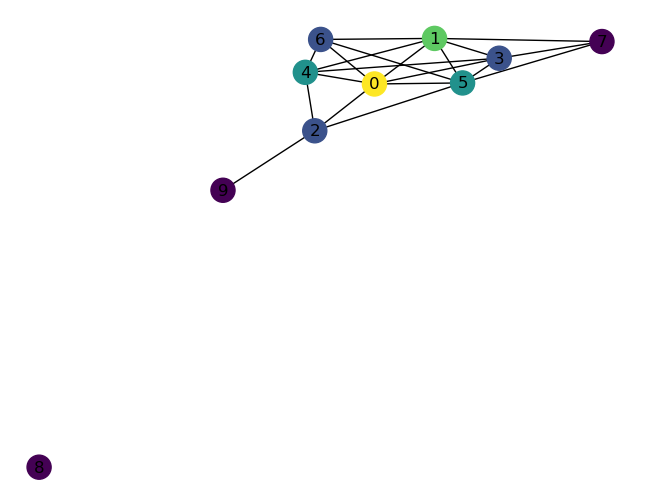

In [226]:
print("Random Skewed Graph", '\n')
graphRandSkew = CreateGraph(10, 20, 'RANDOM', 'SKEWED')
graphRandSkew.populate()
degrees = graphRandSkew.getDegrees()
ordering = graphRandSkew.getSmallestLastVertexOrdering(degrees)
print("Smallest Last Vertex Ordering: ")
print(ordering)
coloring = graphRandSkew.colorGraph(ordering)
print(coloring)
for i in range(coloring.__len__()):
    print("Vertex", i, " is colored ", coloring[i])
visualize_colors(graphRandSkew.AdjList)

Random Custom Graph 

Smallest Last Vertex Ordering: 
[6, 5, 4, 8, 7, 2, 0, 9, 1, 3]
[1, 0, 0, 0, 3, 2, 1, 2, 1, 2]
Vertex 0  is colored  1
Vertex 1  is colored  0
Vertex 2  is colored  0
Vertex 3  is colored  0
Vertex 4  is colored  3
Vertex 5  is colored  2
Vertex 6  is colored  1
Vertex 7  is colored  2
Vertex 8  is colored  1
Vertex 9  is colored  2


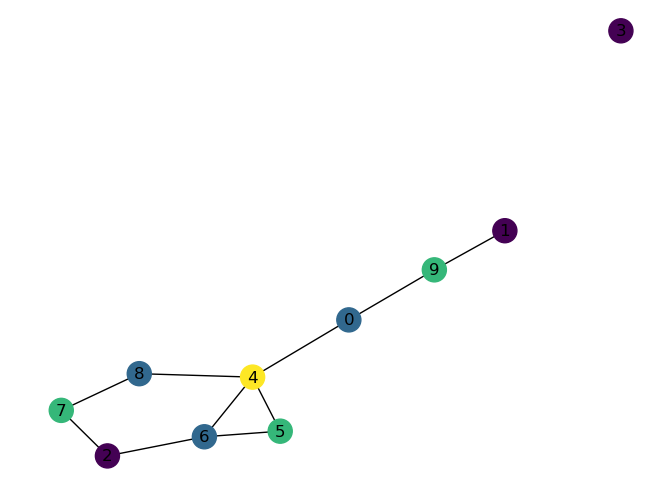

In [227]:
print("Random Custom Graph", '\n')
graphRandCust = CreateGraph(10, 10, 'RANDOM', 'CUSTOM')
graphRandCust.populate()
degrees = []
degrees = graphRandCust.getDegrees()
ordering = graphRandCust.getSmallestLastVertexOrdering(degrees)
print("Smallest Last Vertex Ordering: ")
print(ordering)
coloring = graphRandCust.colorGraph(ordering)
print(coloring)
for i in range(coloring.__len__()):
    print("Vertex", i, " is colored ", coloring[i])
visualize_colors(graphRandCust.AdjList)

# Graph Creation Timing

In [228]:
# timing graph creation
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cycle Graph


,Input Size,Time
0,1000,0.014103
1,2000,0.014412
2,3000,0.021787
3,4000,0.028652
4,5000,0.035661
5,6000,0.044493
6,7000,0.051639
7,8000,0.057674
8,9000,0.064258
9,10000,0.070975


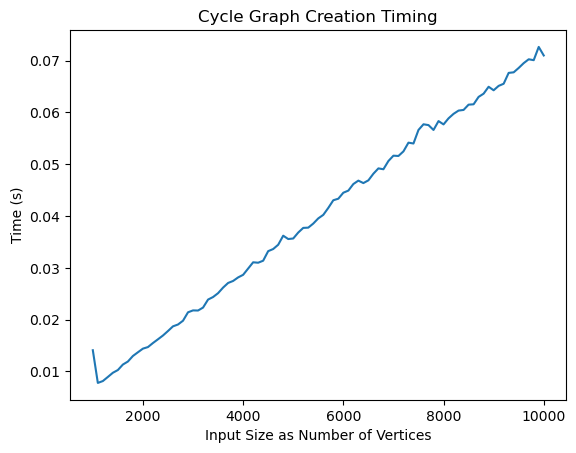

In [229]:
print("Cycle Graph")
input_sizes_cycle = [i for i in range(1000, 10001, 100)]
graph_creation_times_average = [0] * input_sizes_cycle.__len__()
for j in range(50):
    graph_creation_times = []
    for i in input_sizes_cycle:
        time_start = 0
        time_start = time.time()
        graph = CreateGraph(i, 100, 'CYCLE', 'UNIFORM')
        graph.populate()
        time_end = time.time()
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= 10
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_cycle[::10]
df['Time'] = graph_creation_times_average[::10]
display(df)

plt.plot(input_sizes_cycle, graph_creation_times_average) 
plt.title('Cycle Graph Creation Timing')
plt.xlabel('Input Size as Number of Vertices')
plt.ylabel('Time (s)')
plt.show() 

Complete Graph


,Input Size,Time
0,100,0.148051
1,200,0.026808
2,300,0.065841
3,400,0.121399
4,500,0.199677
5,600,0.295449
6,700,0.408320
7,800,0.539783
8,900,0.690637
9,1000,0.846911


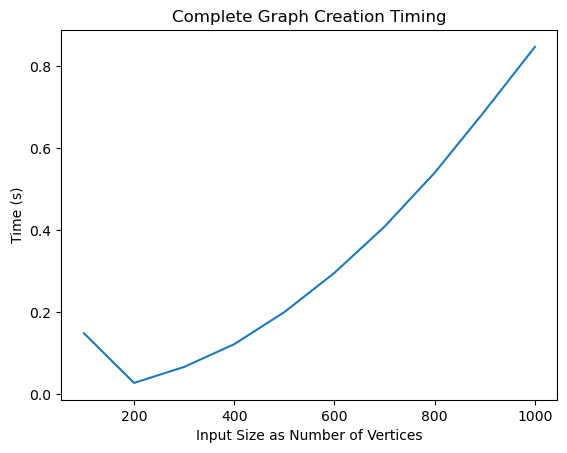

In [230]:
print("Complete Graph")
input_sizes_complete = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
graph_creation_times_average = [0] * input_sizes_complete.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in input_sizes_complete:
        time_start = 0
        time_start = time.time()
        graph = CreateGraph(i, 100, 'COMPLETE', 'UNIFORM')
        graph.populate()
        time_end = time.time()
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials

df = pd.DataFrame(columns = ['Input Size', 'Time'])
df['Input Size'] = input_sizes_complete
df['Time'] = graph_creation_times_average
display(df)
    
plt.plot(input_sizes_complete, graph_creation_times_average) 
plt.title('Complete Graph Creation Timing')
plt.xlabel('Input Size as Number of Vertices')
plt.ylabel('Time (s)')
plt.show()

Random Uniform Graph


,Input Size,Time
0,2000,0.013677
1,4000,0.008843
2,6000,0.013574
3,8000,0.017996
4,10000,0.023292
5,12000,0.027761
6,14000,0.032367
7,16000,0.037671
8,18000,0.044030
9,20000,0.048960


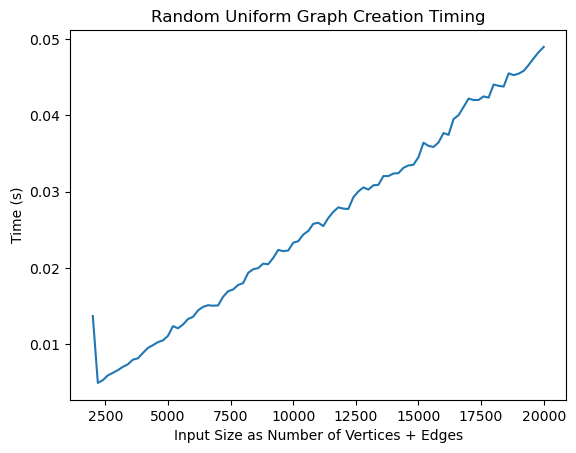

In [231]:
vertex_counts = [i for i in range(1000, 10001, 100)]
edges_counts = [i for i in range(1000, 10001, 100)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_uni = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_uni.append((vertex_counts[j] + edges_counts[j]))

print("Random Uniform Graph")
graph_creation_times_average = [0] * input_sizes_random_uni.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_uni.__len__()):
        time_start = 0
        time_start = time.time()
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'UNIFORM')
        graph.populate()
        time_end = time.time()
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_uni[::10]
df['Time'] = graph_creation_times_average[::10]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Random Uniform Graph Creation Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()

Random Skewed Graph


,Input Size,Time
0,2000,0.010918
1,4000,0.013275
2,6000,0.019982
3,8000,0.026541
4,10000,0.034247
5,12000,0.043548
6,14000,0.053264
7,16000,0.057637
8,18000,0.064463
9,20000,0.071922


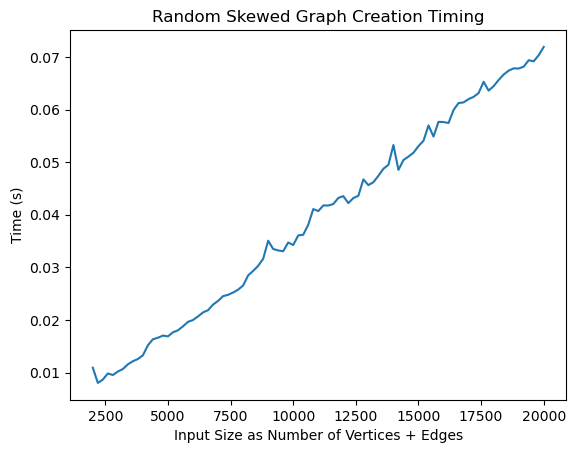

In [232]:
vertex_counts = [i for i in range(1000, 10001, 100)]
edges_counts = [i for i in range(1000, 10001, 100)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_skewed = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_skewed.append((vertex_counts[j] + edges_counts[j]))

print("Random Skewed Graph")
graph_creation_times_average = [0] * input_sizes_random_skewed.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_skewed.__len__()):
        time_start = 0
        time_start = time.time()
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'SKEWED')
        graph.populate()
        time_end = time.time()
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_skewed[::10]
df['Time'] = graph_creation_times_average[::10]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Random Skewed Graph Creation Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()

Random Custom Graph


,Input Size,Time
0,2000,0.009251
1,4000,0.012961
2,6000,0.019853
3,8000,0.026607
4,10000,0.034881
5,12000,0.040389
6,14000,0.046779
7,16000,0.052777
8,18000,0.065068
9,20000,0.070101


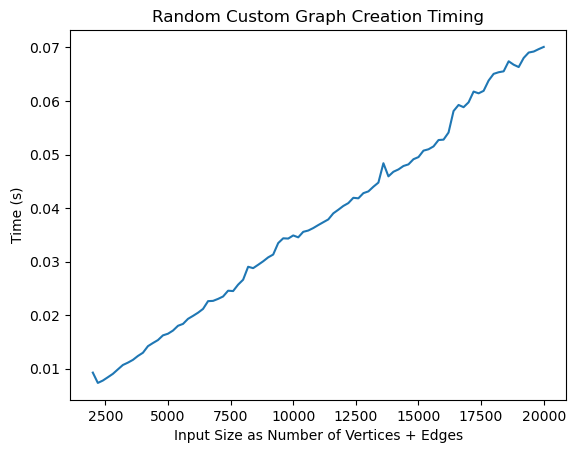

In [233]:
vertex_counts = [i for i in range(1000, 10001, 100)]
edges_counts = [i for i in range(1000, 10001, 100)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_custom = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_custom.append((vertex_counts[j] + edges_counts[j]))

print("Random Custom Graph")
graph_creation_times_average = [0] * input_sizes_random_custom.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_skewed.__len__()):
        time_start = 0
        time_start = time.time()
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'SKEWED')
        graph.populate()
        time_end = time.time()
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_custom[::10]
df['Time'] = graph_creation_times_average[::10]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Random Custom Graph Creation Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()

# Timing of Ordering Algorithms

Smallest Last Vertex Ordering


,Input Size,Time
0,200,0.002266
1,400,0.016415
2,600,0.046508
3,800,0.105857
4,1000,0.199817
5,1200,0.344724
6,1400,0.530976
7,1600,0.788341
8,1800,1.110274
9,2000,1.510243


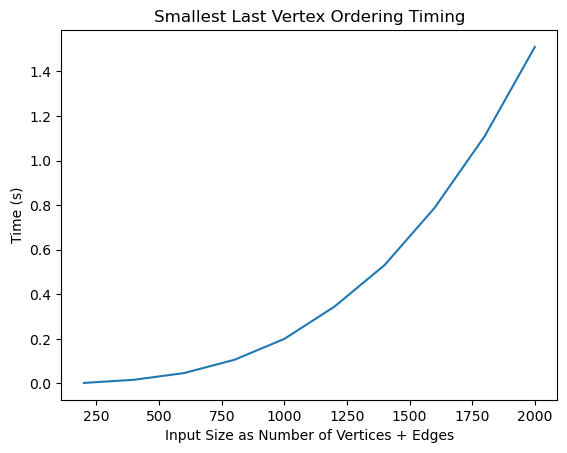

In [247]:
vertex_counts = [i for i in range(100, 1001, 100)]
edges_counts = [i for i in range(100, 1001, 100)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_uni = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_uni.append((vertex_counts[j] + edges_counts[j]))

print("Smallest Last Vertex Ordering")
graph_creation_times_average = [0] * input_sizes_random_uni.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_uni.__len__()):
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'UNIFORM')
        graph.populate()
        degrees = graph.getDegrees()


        time_start = 0
        time_start = time.time()
        ordering = graph.getSmallestLastVertexOrdering(degrees)
        time_end = time.time()

        coloring = graph.colorGraph(ordering)
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_uni[::1]
df['Time'] = graph_creation_times_average[::1]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Smallest Last Vertex Ordering Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()

Smallest Original Degree Ordering


,Input Size,Time
0,200,0.000575
1,400,0.002047
2,600,0.004486
3,800,0.008525
4,1000,0.013940
5,1200,0.019295
6,1400,0.026358
7,1600,0.034552
8,1800,0.044226
9,2000,0.054896


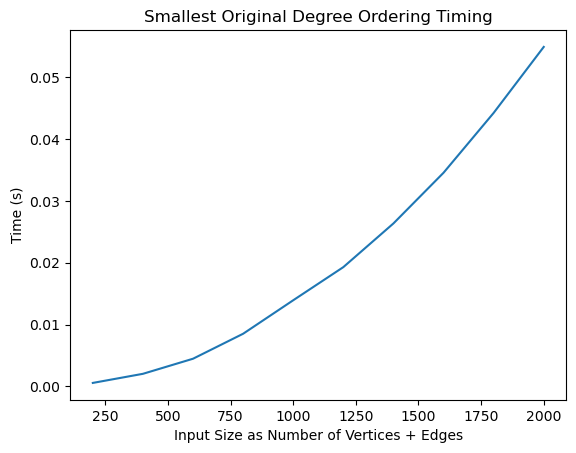

In [248]:
vertex_counts = [i for i in range(100, 1001, 100)]
edges_counts = [i for i in range(100, 1001, 100)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_uni = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_uni.append((vertex_counts[j] + edges_counts[j]))

print("Smallest Original Degree Ordering")
graph_creation_times_average = [0] * input_sizes_random_uni.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_uni.__len__()):
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'UNIFORM')
        graph.populate()
        degrees = graph.getDegrees()

        time_start = 0
        time_start = time.time()        
        ordering = graph.getSmallestOriginalDegreeOrdering(degrees)
        time_end = time.time()  

        coloring = graph.colorGraph(ordering)
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_uni[::1]
df['Time'] = graph_creation_times_average[::1]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Smallest Original Degree Ordering Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()

Largest Original Degree Ordering


,Input Size,Time
0,200,0.000561
1,400,0.002033
2,600,0.004514
3,800,0.008289
4,1000,0.013019
5,1200,0.018864
6,1400,0.026301
7,1600,0.034576
8,1800,0.044380
9,2000,0.053525


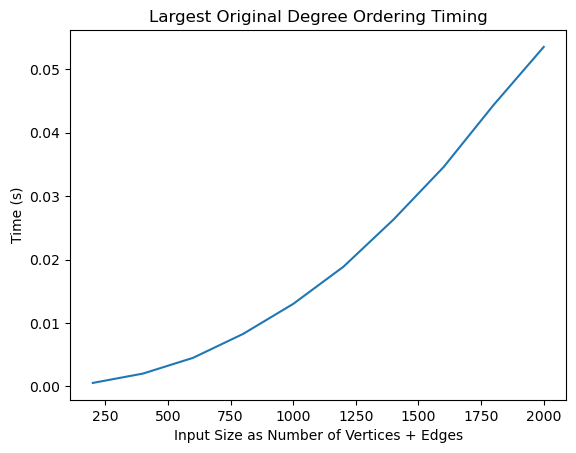

In [251]:
vertex_counts = [i for i in range(100, 1001, 100)]
edges_counts = [i for i in range(100, 1001, 100)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_uni = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_uni.append((vertex_counts[j] + edges_counts[j]))

print("Largest Original Degree Ordering")
graph_creation_times_average = [0] * input_sizes_random_uni.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_uni.__len__()):
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'UNIFORM')
        graph.populate()
        degrees = graph.getDegrees()

        time_start = 0
        time_start = time.time()        
        ordering = graph.getLargestOriginalDegreeOrdering(degrees)
        time_end = time.time()  

        coloring = graph.colorGraph(ordering)
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_uni[::1]
df['Time'] = graph_creation_times_average[::1]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Largest Original Degree Ordering Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()

Uniform Random Ordering


,Input Size,Time
0,2000,0.000641
1,4000,0.000966
2,6000,0.001486
3,8000,0.002007
4,10000,0.002482
5,12000,0.003103
6,14000,0.003860
7,16000,0.004128
8,18000,0.004783
9,20000,0.005282


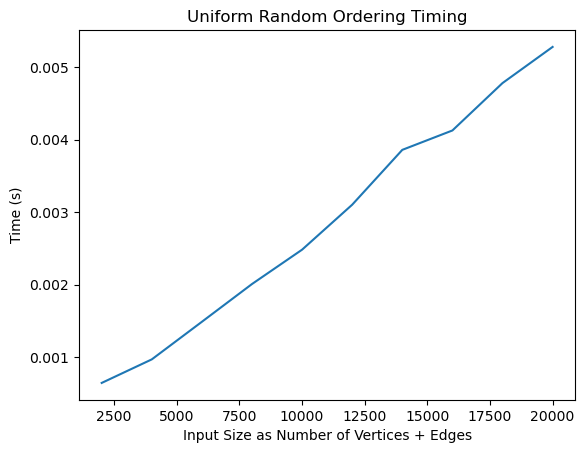

In [254]:
vertex_counts = [i for i in range(1000, 10001, 1000)]
edges_counts = [i for i in range(1000, 10001, 1000)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_uni = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_uni.append((vertex_counts[j] + edges_counts[j]))

print("Uniform Random Ordering")
graph_creation_times_average = [0] * input_sizes_random_uni.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_uni.__len__()):
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'UNIFORM')
        graph.populate()
        degrees = graph.getDegrees()

        time_start = 0
        time_start = time.time()        
        ordering = graph.getUniformRandomOrdering()
        time_end = time.time()  

        coloring = graph.colorGraph(ordering)
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_uni[::1]
df['Time'] = graph_creation_times_average[::1]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Uniform Random Ordering Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()

Minimum Width Ordering


,Input Size,Time
0,20,0.000380
1,40,0.000867
2,60,0.001630
3,80,0.002379
4,100,0.003535
5,120,0.004984
6,140,0.006987
7,160,0.008311
8,180,0.010412
9,200,0.012972


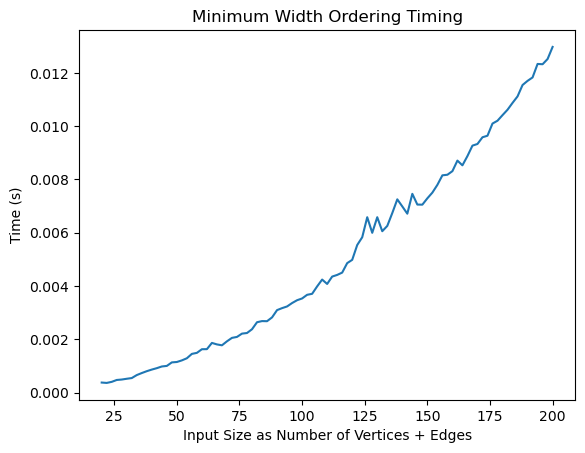

In [258]:
vertex_counts = [i for i in range(10, 101, 1)]
edges_counts = [i for i in range(10, 101, 1)]
# add vertex counts and edge counts to make input_sizes_random_uni
input_sizes_random_uni = []
for j in range(vertex_counts.__len__()):
    input_sizes_random_uni.append((vertex_counts[j] + edges_counts[j]))

print("Minimum Width Ordering")
graph_creation_times_average = [0] * input_sizes_random_uni.__len__()
num_trials = 25
for j in range(num_trials):
    graph_creation_times = []
    for i in range(input_sizes_random_uni.__len__()):
        graph = CreateGraph(vertex_counts[i], edges_counts[i], 'RANDOM', 'UNIFORM')
        graph.populate()
        degrees = graph.getDegrees()

        time_start = 0
        time_start = time.time()        
        ordering = graph.getMinimumWidthOrdering(degrees)
        time_end = time.time()  

        coloring = graph.colorGraph(ordering)
        graph_creation_times.append(time_end - time_start)
    
    for x in range(graph_creation_times.__len__()):
        graph_creation_times_average[x] += graph_creation_times[x]

for x in range(graph_creation_times_average.__len__()):
    graph_creation_times_average[x] /= num_trials
    
df = pd.DataFrame(columns = ['Input Size', 'Time'])
#put every 10th value in the input_sizes_random_uni list into the dataframe
df['Input Size'] = input_sizes_random_uni[::10]
df['Time'] = graph_creation_times_average[::10]
display(df)

plt.plot(input_sizes_random_uni, graph_creation_times_average) 
plt.title('Minimum Width Ordering Timing')
plt.xlabel('Input Size as Number of Vertices + Edges')
plt.ylabel('Time (s)')
plt.show()